1. Scraping the Pokemon Sprites

In [ ]:
from bs4 import BeautifulSoup
import requests

spritesDir = "sprites"
names = []

soup = BeautifulSoup(open("pokemon_list.html").read(), features="html.parser")
# loop over all div elements
for div in soup.findAll("div", class_="infocard"):
    href = div.find("a", href = True).attrs["href"]
    names.append(href[href.rfind("/") + 1 : ])

# print(names)

# loop over the pokemon names
for name in names:
	# initialize the parsed name as just the lowercase
	# version of the pokemon name
	parsedName = name.lower()

	# if the name contains an apostrophe (such as in
	# Farfetch'd, just simply remove it)
	parsedName = parsedName.replace("'", "")

	# if the name contains a period followed by a space
	# (as is the case with Mr. Mime), then replace it
	# with a dash
	parsedName = parsedName.replace(". ", "-")

	# handle the case for Nidoran (female)
	if name.find(u'\u2640') != -1:
		parsedName = "nidoran-f"

	# and handle the case for Nidoran (male)
	elif name.find(u'\u2642') != -1:
		parsedName = "nidoran-m"

    # construct the URL to download the sprite
	print("[x] downloading {}".format(parsedName))
	url = "http://img.pokemondb.net/sprites/red-blue/normal/{}.png".format(parsedName)
	print(url)
	r = requests.get(url)

	# if the status code is not 200, ignore the sprite
	if r.status_code != 200:
		print("[x] error downloading {}".format(name))
		continue

	f = open("{}/{}.png".format(spritesDir, name.lower()), "wb")
	f.write(r.content)
	f.close()


2. Indexing our Sprites using Shape Descriptors

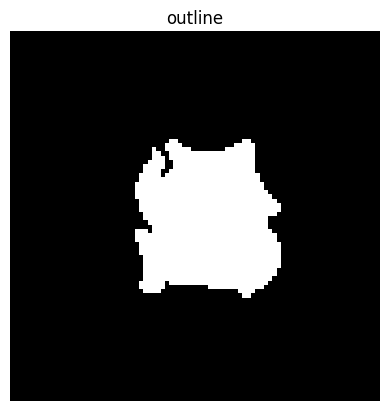

[0.31830989 0.00137926 0.24653755 0.03015183 0.00321483 0.03953142
 0.10837637 0.00404093 0.09652134 0.005004   0.01573373 0.0197918
 0.04699774 0.03764576 0.04850296 0.03677655 0.00160505 0.02787968
 0.02815242 0.05123364 0.04502072 0.03710325 0.05971383 0.00891869
 0.02457978]


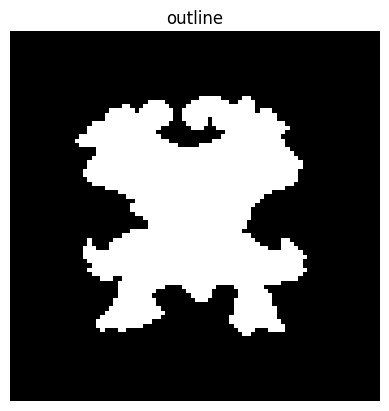

[3.18309886e-01 5.18469258e-03 9.81078532e-02 3.47063598e-02
 1.10397396e-02 4.53865852e-02 1.35398585e-03 1.78299004e-02
 1.24680494e-01 3.41101476e-02 4.22048204e-02 3.52697725e-02
 3.85179215e-02 1.48659845e-02 4.13588910e-02 3.92541391e-02
 3.20083988e-02 3.49674125e-02 5.54089229e-03 4.59654697e-02
 2.04543841e-04 1.96522117e-02 2.60364267e-02 9.91252577e-03
 8.37508630e-03]


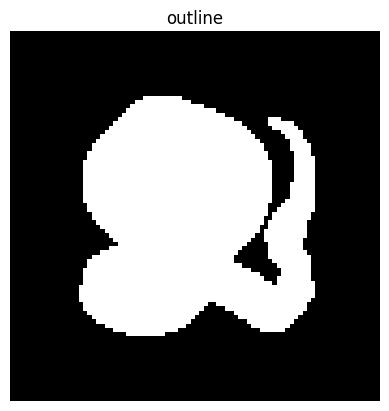

[0.31830989 0.02648673 0.02674778 0.03130476 0.00566608 0.01979966
 0.00215193 0.01375786 0.0115664  0.01690441 0.02503902 0.017418
 0.00696048 0.01582764 0.03795237 0.01900471 0.00245711 0.01555704
 0.01889733 0.02825096 0.01179209 0.01089939 0.01061253 0.02240596
 0.04859128]


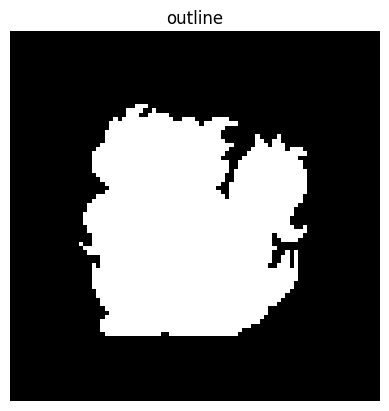

[3.18309886e-01 1.14303049e-02 5.94729480e-03 1.03786383e-02
 3.98745165e-03 1.22717031e-02 2.18766128e-03 4.57055132e-03
 1.76514867e-02 3.94639386e-03 1.50834411e-02 1.93208560e-02
 2.07447228e-04 4.28793570e-03 1.14778093e-02 2.11405408e-02
 5.74037957e-03 1.01130087e-02 3.48003718e-03 9.72015370e-03
 6.27910198e-03 4.64687113e-03 7.17770187e-03 5.47171475e-03
 9.84991932e-03]


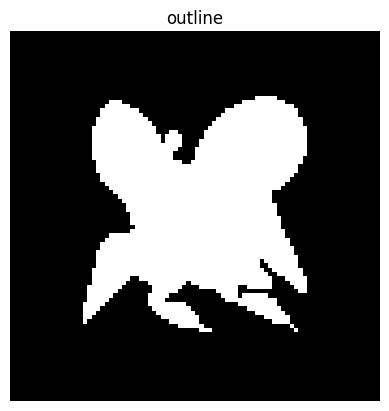

[0.31830989 0.01676562 0.07387266 0.01236263 0.00728831 0.02487627
 0.04145502 0.00794548 0.09962248 0.01355322 0.01544037 0.03074079
 0.01485937 0.01502437 0.01684013 0.01236709 0.00839056 0.00977813
 0.02153464 0.02307489 0.00238283 0.0211577  0.01158656 0.01090577
 0.06966634]


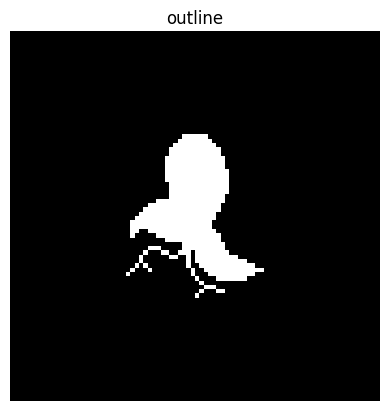

[0.31830989 0.00130915 0.43377015 0.11928119 0.08269828 0.10391636
 0.16137108 0.19061924 0.0527586  0.07337548 0.17338059 0.06681188
 0.05989161 0.10010808 0.13067468 0.0148468  0.05400489 0.1031133
 0.10639874 0.0168676  0.00993105 0.04458943 0.12324518 0.02727306
 0.04051497]


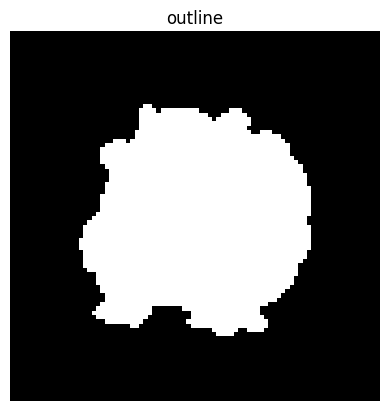

[0.31830989 0.00179148 0.00043144 0.00113238 0.00361896 0.00424343
 0.00087058 0.0020337  0.00283156 0.00551625 0.00643317 0.00589648
 0.00151672 0.00314757 0.00353512 0.00526546 0.00750582 0.00871404
 0.00772448 0.00378075 0.00241332 0.00452702 0.00384856 0.0066971
 0.00239698]


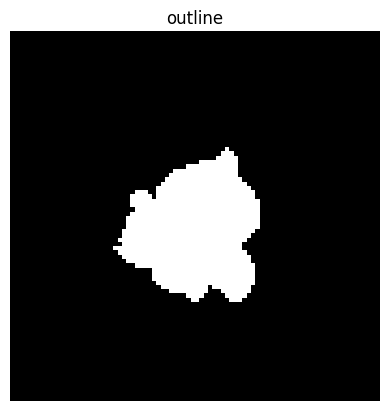

[3.18309886e-01 3.49213763e-16 3.72272440e-01 1.51971671e-02
 1.04829795e-02 7.68353431e-02 7.07659271e-02 2.25880350e-02
 1.50594729e-02 4.43725930e-03 8.54788572e-02 6.50695182e-03
 1.38738824e-01 6.27580046e-03 1.67640101e-02 4.85981973e-02
 1.79749812e-02 5.29137419e-02 3.20532716e-02 1.92078650e-02
 4.24744792e-02 2.86549804e-02 1.55663007e-02 7.99791400e-02
 1.68995487e-02]


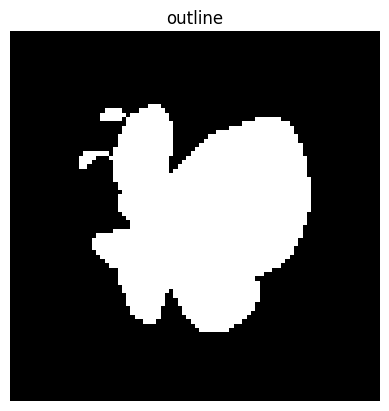

[0.31830989 0.02477477 0.03506518 0.02408373 0.0131313  0.03072949
 0.01416116 0.00153136 0.0325629  0.00832711 0.02290768 0.05276359
 0.00377365 0.00814099 0.02663733 0.00491639 0.00757082 0.00848047
 0.01595278 0.0164835  0.00674677 0.01550255 0.02002837 0.02304332
 0.02773465]


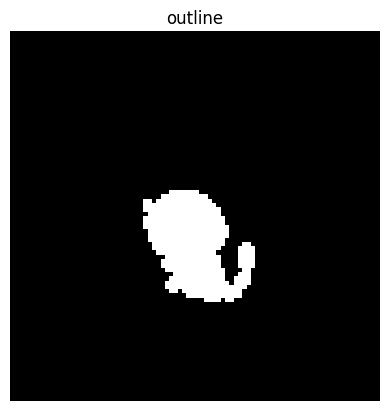

[3.18309886e-01 2.62348964e-16 5.89595451e-01 7.53163447e-02
 2.74963054e-02 7.15036346e-03 2.84917996e-01 1.92010023e-01
 1.61658496e-02 7.97550436e-02 1.67376479e-02 2.18817841e-03
 7.21129692e-02 1.64810595e-01 4.62842114e-02 4.93624814e-03
 6.88720956e-02 2.83833665e-02 1.21485943e-02 3.46842139e-03
 8.55824471e-02 1.46684022e-01 3.43917057e-02 1.62364729e-02
 2.83572879e-03]


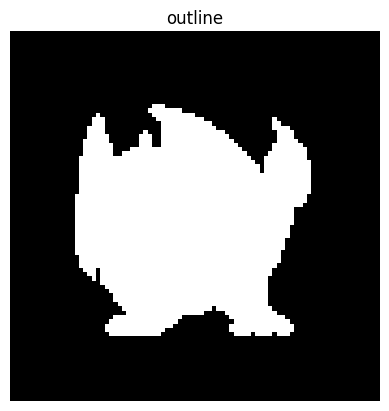

[3.18309886e-01 1.27199722e-03 1.51297931e-04 3.85582815e-03
 1.98920486e-03 7.15170383e-03 1.54171106e-03 5.30525900e-03
 3.34622467e-03 2.20940499e-03 9.45148948e-03 3.94459441e-03
 4.17977171e-03 5.85232011e-03 2.09068241e-03 3.46638273e-03
 2.82212280e-03 1.11589597e-02 5.26170172e-03 8.53960844e-03
 7.56697818e-03 6.16821662e-03 4.17095726e-04 2.65137057e-04
 8.46721193e-03]


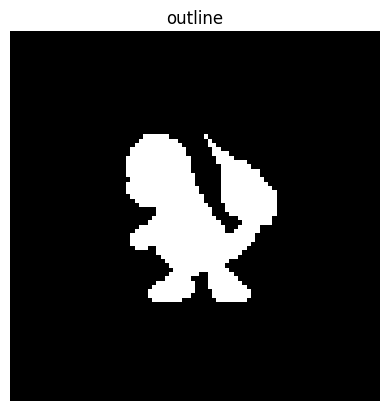

[0.31830989 0.00323479 0.21399362 0.06296158 0.02061964 0.12653248
 0.05476549 0.0307738  0.0685461  0.11286427 0.10007077 0.01380819
 0.01249674 0.04315923 0.05464101 0.09387122 0.06739313 0.01692292
 0.02726376 0.04763565 0.02777619 0.05773745 0.05269766 0.03090271
 0.06923047]


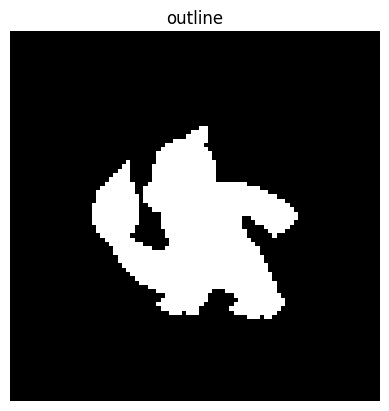

[0.31830989 0.00461393 0.13085903 0.03913561 0.03229608 0.00810667
 0.04234062 0.07661914 0.04238602 0.05494414 0.03900456 0.11798409
 0.02668036 0.04909332 0.02463458 0.0595356  0.0170688  0.02773559
 0.06400987 0.06789367 0.0276447  0.01370208 0.08592131 0.07971209
 0.03628827]


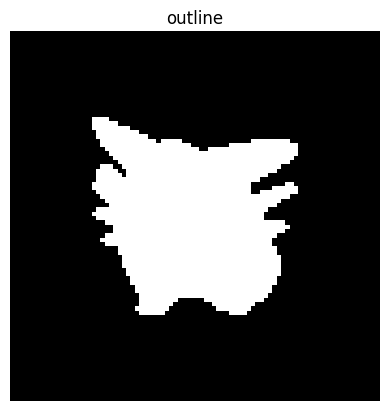

[0.31830989 0.02211997 0.07485742 0.02743158 0.01678146 0.01993936
 0.0571139  0.01958286 0.05392716 0.01061654 0.01376868 0.02994393
 0.01557813 0.00380523 0.01408097 0.04449834 0.01486641 0.00973995
 0.03195827 0.01104389 0.00764467 0.00526909 0.01468982 0.02211959
 0.01292516]


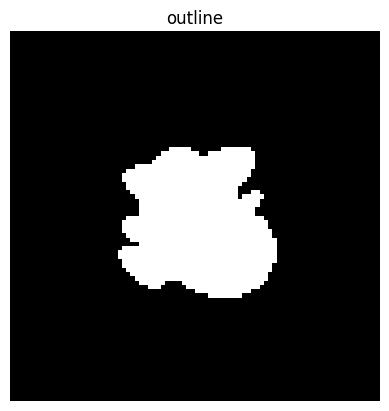

[3.18309886e-01 2.24218462e-16 2.28258929e-01 3.08779630e-02
 9.44661416e-03 5.96236050e-02 1.13204275e-01 2.20707503e-02
 8.53156080e-02 7.19899463e-03 4.63704604e-02 4.75088999e-02
 7.00899706e-03 2.92775041e-02 3.36354924e-02 2.22139004e-03
 9.23695164e-03 4.58268047e-02 5.27054856e-02 3.37096781e-02
 1.77857305e-02 1.64523786e-02 6.65543191e-02 2.61599095e-02
 4.09976043e-02]


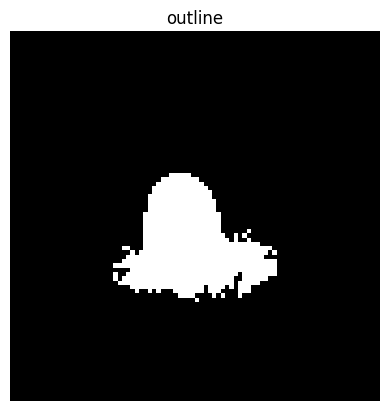

[3.18309886e-01 2.46234787e-16 4.28985286e-01 5.23395475e-02
 4.51878281e-02 1.18149416e-01 7.36693308e-02 6.02123132e-02
 1.97947571e-02 3.34142129e-02 1.94616126e-01 5.82195449e-02
 7.64727474e-02 5.72926666e-02 3.45623692e-02 3.86173179e-02
 4.83327826e-02 5.90703946e-02 7.82731006e-02 2.83020714e-02
 5.12125047e-02 1.41243978e-02 1.50545600e-02 5.66303943e-02
 3.44962234e-02]


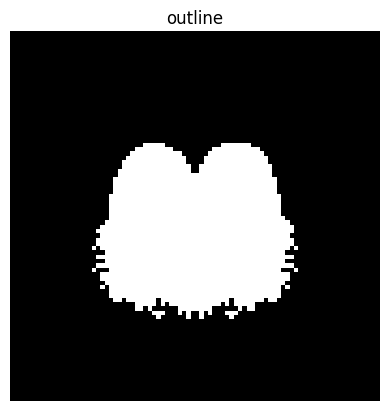

[0.31830989 0.00090038 0.03889845 0.04561913 0.00857628 0.00335846
 0.02354749 0.03051918 0.04821128 0.01013909 0.01222468 0.02270897
 0.00138799 0.00623715 0.0157487  0.02605938 0.00438533 0.00767751
 0.00998964 0.02394221 0.01516952 0.00525077 0.00648103 0.00495101
 0.00434702]


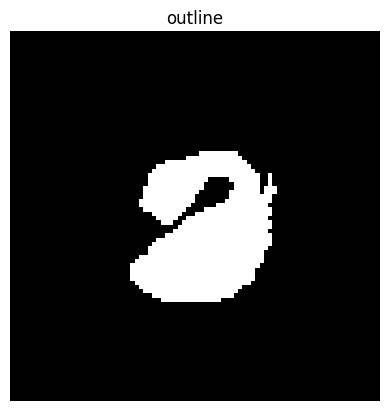

[3.18309886e-01 2.12938901e-15 2.68314763e-01 6.71197540e-02
 5.53917433e-02 4.00712785e-02 1.48735564e-01 4.28248609e-02
 6.10772910e-02 8.48860310e-02 7.46331085e-02 3.49331014e-02
 1.70195656e-02 1.00013070e-01 7.54020900e-02 1.66216455e-02
 3.36768204e-02 6.48317964e-02 4.25840113e-02 2.08531093e-02
 1.17077196e-01 7.71965229e-02 4.00386289e-02 1.84842262e-02
 2.55388289e-02]


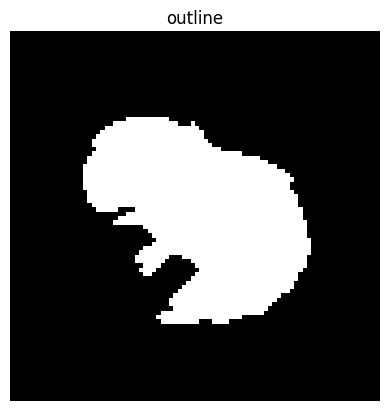

[0.31830989 0.03641532 0.07774778 0.08593858 0.02885685 0.05485945
 0.00671405 0.01695083 0.02918991 0.02600527 0.03486807 0.01464071
 0.00664463 0.00373947 0.02884562 0.04489898 0.02110543 0.02082705
 0.01548636 0.02994318 0.00090075 0.00475055 0.01118742 0.05631294
 0.02143622]


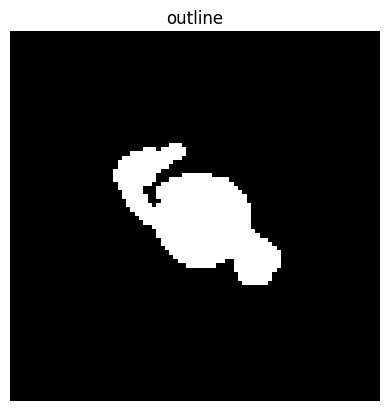

[0.31830989 0.00530591 0.33652348 0.19340984 0.02444966 0.00349553
 0.17911946 0.08068508 0.14891688 0.06941339 0.01421474 0.02718525
 0.0210167  0.069856   0.04787382 0.10186574 0.03798659 0.02742866
 0.05740999 0.02619109 0.12083007 0.07040807 0.04095308 0.01046297
 0.06263699]


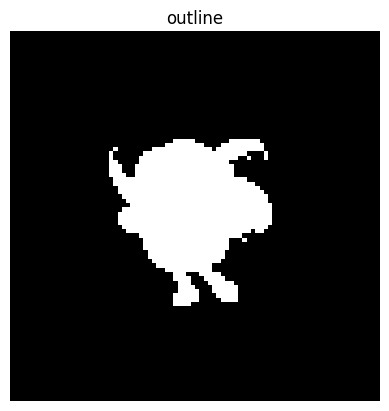

[0.31830989 0.00986589 0.30572629 0.01155323 0.03275686 0.07190882
 0.0399359  0.01520734 0.03316545 0.02653557 0.0504088  0.04874772
 0.12186944 0.0191935  0.08212122 0.05049856 0.04419223 0.01653905
 0.04921063 0.05718147 0.02864463 0.00901465 0.01524881 0.05896255
 0.0180265 ]


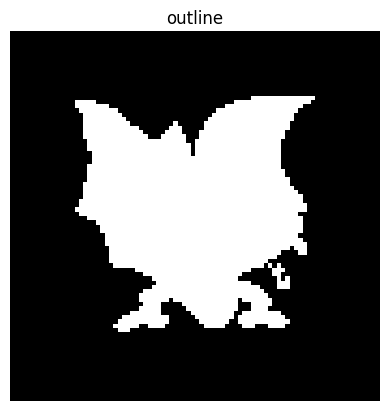

[0.31830989 0.01059491 0.03001998 0.02487534 0.00591057 0.02808208
 0.02476414 0.01521037 0.01861444 0.00348671 0.01230138 0.03567642
 0.0138169  0.00429063 0.01988813 0.01333917 0.00587327 0.00483579
 0.00627531 0.02072258 0.00455323 0.00606632 0.01120167 0.01347648
 0.0185906 ]


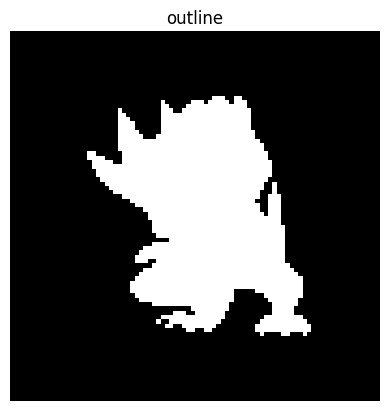

[0.31830989 0.01041815 0.07621447 0.09102196 0.01610421 0.01678868
 0.02072101 0.01834451 0.07845325 0.02738935 0.01226081 0.00371961
 0.00051241 0.00679581 0.02402904 0.01744356 0.00861663 0.00383871
 0.01820793 0.03183099 0.00300432 0.01297546 0.00637657 0.04839028
 0.0249327 ]


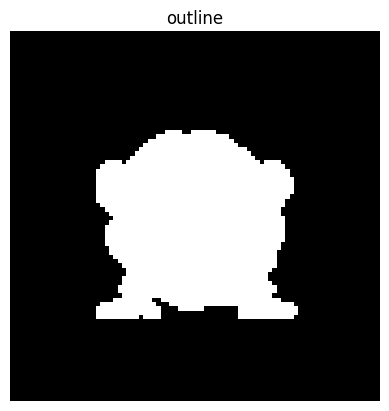

[0.31830989 0.01591771 0.03121301 0.01104193 0.02331542 0.00971133
 0.03641526 0.0105534  0.02433339 0.01872294 0.00749065 0.01354111
 0.02717468 0.00411705 0.02452882 0.02074905 0.00666735 0.00221847
 0.00801223 0.00319896 0.01008717 0.00706573 0.02061644 0.01852729
 0.02279902]


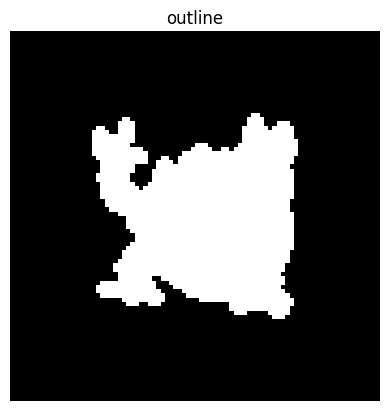

[0.31830989 0.04239741 0.09568236 0.04896672 0.03015913 0.03030479
 0.04335535 0.03126379 0.04590055 0.01991844 0.00707074 0.02846526
 0.03085474 0.00907414 0.04125722 0.05696293 0.03409543 0.01892534
 0.01751424 0.02357656 0.04431478 0.01510456 0.02026678 0.00075706
 0.01751914]


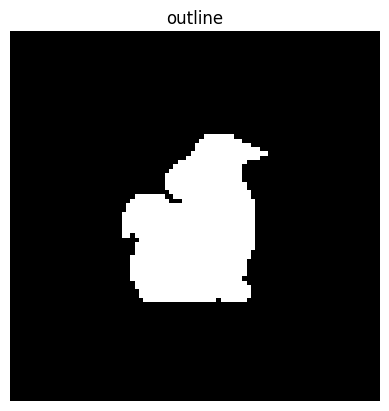

[0.31830989 0.019116   0.27347311 0.09545363 0.02969839 0.07078543
 0.06435785 0.02153094 0.05388652 0.0579535  0.04053577 0.07446103
 0.07571393 0.05425289 0.02255059 0.0544788  0.01490161 0.01099991
 0.06451951 0.02463588 0.02549968 0.01082164 0.03527727 0.03770628
 0.01351811]


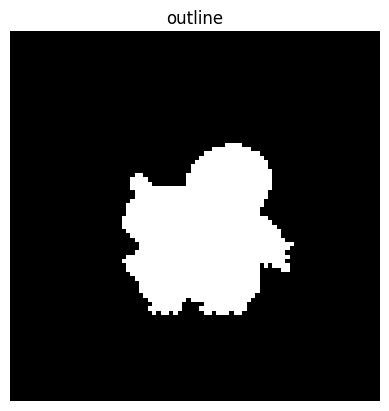

[0.31830989 0.00858978 0.17289184 0.04050488 0.0162957  0.04275835
 0.08884098 0.01509821 0.08015842 0.03091059 0.03022223 0.06971332
 0.00240194 0.01127815 0.02292734 0.04242792 0.01516838 0.02517564
 0.05529313 0.04841351 0.00197175 0.00829282 0.01176835 0.0538003
 0.01787907]


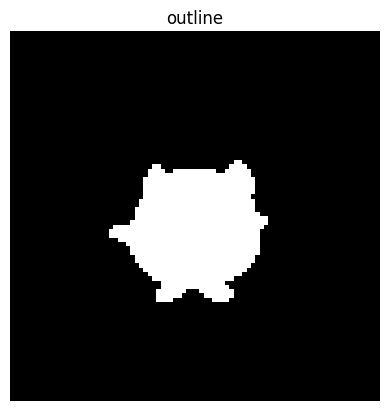

[3.18309886e-01 1.78089876e-16 3.82660563e-01 1.85810948e-02
 4.86318656e-03 2.82387937e-02 7.68295996e-02 1.24910173e-02
 1.38209314e-02 3.46959067e-03 2.48251851e-02 3.06230924e-02
 1.59718942e-01 2.09086750e-02 3.23764902e-02 4.41729821e-02
 8.09980730e-03 3.32021253e-02 5.26888047e-02 2.08320423e-02
 4.82687443e-02 1.13418002e-02 7.13922503e-03 8.52623057e-02
 1.47113678e-02]


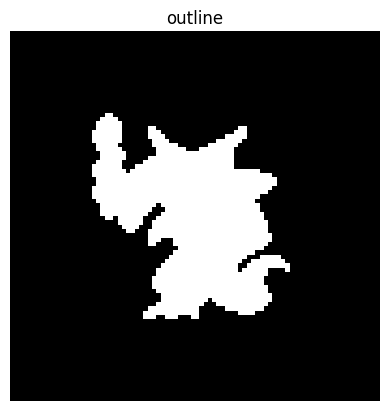

[0.31830989 0.03318679 0.1337357  0.07637819 0.06117199 0.09172434
 0.04194687 0.02836988 0.04414656 0.01056098 0.04015076 0.0506262
 0.00685645 0.0093362  0.03530644 0.01392405 0.02877338 0.00926122
 0.01919981 0.06034213 0.0669926  0.0069986  0.02549231 0.03110004
 0.07224468]


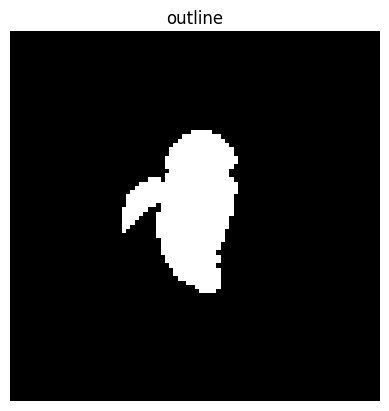

[3.18309886e-01 4.04530469e-16 4.35354824e-01 1.08373217e-01
 3.70518689e-02 8.08397246e-02 9.72758884e-02 1.43683100e-01
 7.56590606e-02 1.19082294e-02 1.25850203e-01 5.13820698e-02
 3.77850920e-02 4.26642128e-03 1.45912819e-01 2.72830865e-02
 5.88540225e-02 5.49172046e-02 4.38340514e-02 4.37142600e-02
 3.28590314e-02 6.06764833e-02 8.52762061e-02 1.34277077e-02
 3.18317899e-02]


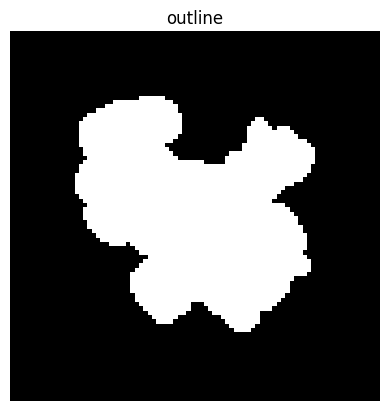

[0.31830989 0.04380297 0.04388777 0.05838411 0.00195834 0.06640313
 0.02169912 0.02585748 0.02030608 0.02342943 0.02609886 0.06143148
 0.02218269 0.01699561 0.02540155 0.02725589 0.01819406 0.01148963
 0.01993694 0.03089077 0.00766057 0.02208369 0.01441794 0.01496003
 0.0173602 ]


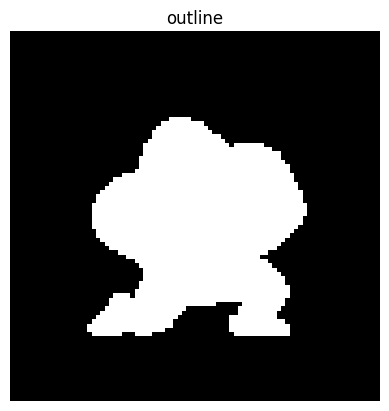

[0.31830989 0.02992352 0.05602352 0.00474103 0.0303832  0.01123797
 0.03672803 0.00602436 0.02994335 0.00395725 0.00106253 0.07013769
 0.00125779 0.00532767 0.01271835 0.0633565  0.02097138 0.00641975
 0.00526839 0.01041084 0.01695937 0.00477182 0.0120979  0.00185843
 0.03201984]


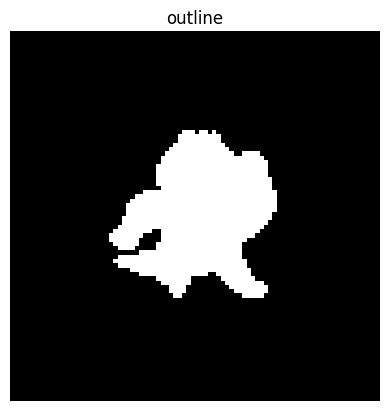

[3.18309886e-01 9.38396846e-03 2.41146085e-01 6.54967248e-02
 2.74677555e-02 4.83869265e-02 7.58590777e-02 3.73362476e-02
 6.69153267e-02 2.84470783e-02 1.97526175e-02 4.25427859e-02
 1.43538147e-02 6.93874383e-02 3.63815042e-02 1.79343954e-02
 1.20781371e-02 3.54541847e-02 8.60968617e-02 7.42988957e-02
 1.41025828e-04 2.26738897e-03 3.25005610e-02 6.16140969e-02
 3.79427485e-02]


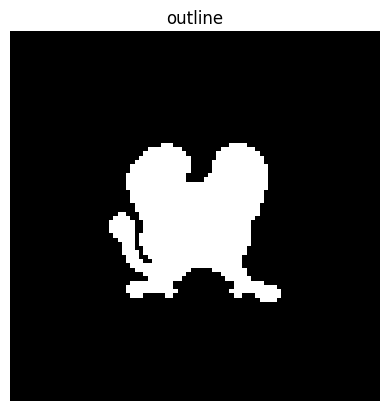

[0.31830989 0.02132782 0.24172234 0.04224622 0.01421947 0.03044161
 0.0378458  0.03881849 0.12656586 0.06486882 0.05136625 0.05072681
 0.01008857 0.03357277 0.09854505 0.06899386 0.02754216 0.01455035
 0.04907081 0.04894375 0.01541899 0.01410222 0.02889522 0.07154469
 0.03088381]


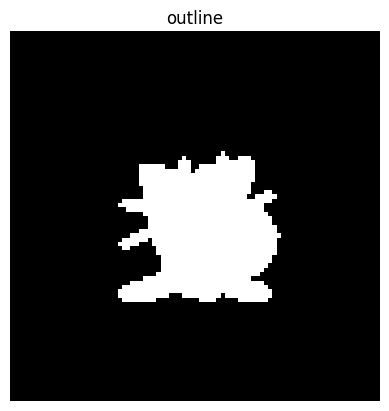

[0.31830989 0.01183295 0.26121314 0.02042576 0.03253811 0.00987205
 0.0797658  0.03470267 0.086685   0.03351024 0.03021777 0.03613388
 0.05656849 0.0090299  0.04075226 0.04260082 0.03802365 0.02358576
 0.02180305 0.03275191 0.03022974 0.03317814 0.04285638 0.06563965
 0.05483077]


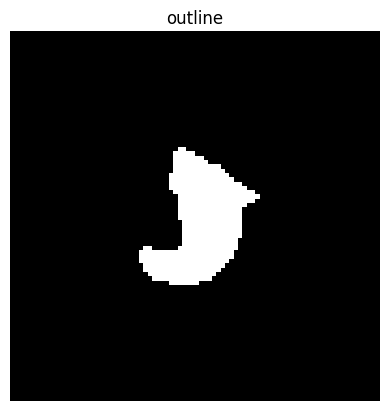

[3.18309886e-01 2.42652337e-16 5.15228670e-01 9.94462160e-02
 6.65971658e-02 5.97333749e-02 1.58783303e-01 2.38553187e-01
 1.87338501e-02 1.66485389e-01 1.24117342e-01 2.37649625e-02
 6.93245978e-02 1.83366463e-01 4.34359908e-02 2.62069581e-02
 1.09161782e-01 5.78968976e-02 7.40403618e-02 1.01614351e-02
 9.28623479e-03 9.91366407e-02 2.24041038e-02 8.16490885e-02
 5.20449410e-03]


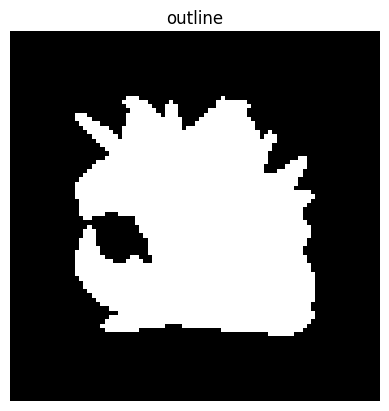

[0.31830989 0.03351678 0.02244254 0.04091682 0.01036018 0.04020942
 0.01092642 0.00230335 0.03788267 0.01299769 0.0138978  0.03719556
 0.01091431 0.0136261  0.01876329 0.02115509 0.00721935 0.0094718
 0.01875297 0.03116789 0.00795032 0.01765928 0.01819658 0.02660593
 0.00997859]


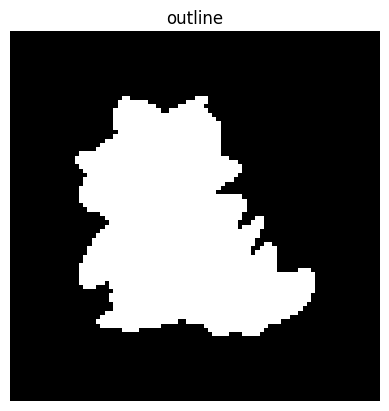

[0.31830989 0.02733909 0.04374516 0.05185349 0.01409428 0.03633814
 0.01462576 0.0236357  0.03298906 0.00882333 0.00750739 0.03013993
 0.00784281 0.00421967 0.01028001 0.01462493 0.00600237 0.01245748
 0.0107378  0.01467043 0.0043275  0.01389569 0.00693206 0.01879317
 0.02127037]


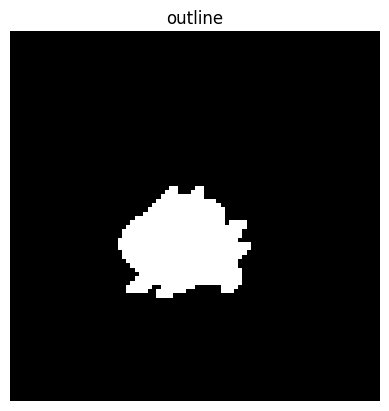

[3.18309886e-01 3.17056339e-16 5.48840123e-01 3.79688705e-02
 1.28251011e-02 2.58686690e-02 1.70230103e-01 8.52347973e-02
 6.95764177e-03 2.51185993e-02 6.93065382e-02 9.11804680e-03
 2.00624151e-01 3.54187260e-02 2.66580394e-02 2.30638188e-03
 7.01151008e-03 5.37016391e-02 3.59719308e-02 1.12456130e-02
 1.52141353e-01 6.75287705e-02 4.48252537e-02 5.49952269e-03
 5.08537662e-03]


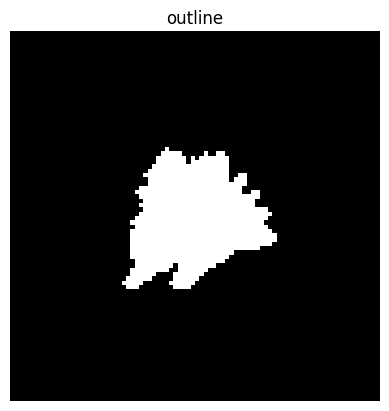

[0.31830989 0.00354635 0.40471796 0.03707257 0.02706281 0.07580863
 0.01416511 0.03222248 0.0139474  0.01530076 0.09103847 0.0341038
 0.15641762 0.01583802 0.01690979 0.04261178 0.04055763 0.01718771
 0.07509799 0.02106658 0.00214935 0.03488713 0.01760874 0.03693565
 0.0218463 ]


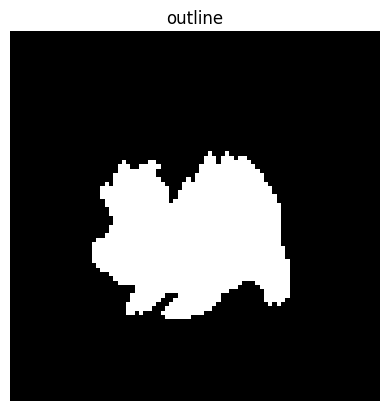

[0.31830989 0.00623531 0.10110335 0.08673345 0.0306784  0.03452594
 0.03929066 0.01154819 0.04759359 0.01746483 0.0254677  0.0602783
 0.01045143 0.02436845 0.03397798 0.02649679 0.02378067 0.02727884
 0.0403171  0.02728152 0.02010625 0.00840911 0.01892704 0.01248788
 0.02575898]


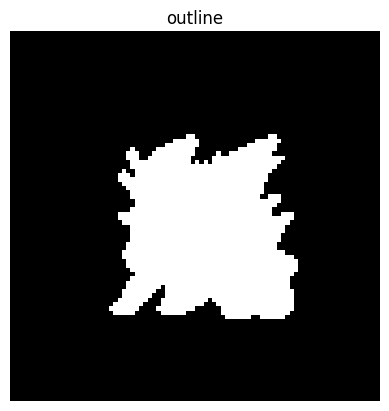

[0.31830989 0.00629367 0.09661926 0.02762887 0.00047969 0.02517704
 0.06371965 0.024033   0.07363012 0.01115143 0.00898141 0.01555868
 0.00226055 0.01404799 0.01986623 0.03570536 0.01380236 0.00682435
 0.0091496  0.02336398 0.02135086 0.00343515 0.01592941 0.02092086
 0.04877396]


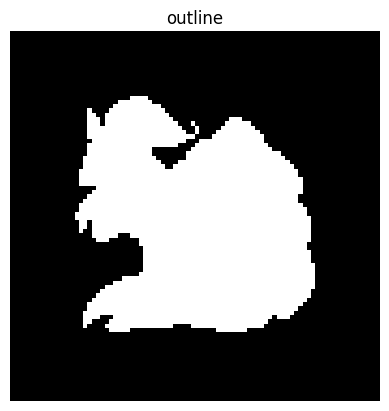

[0.31830989 0.02791923 0.03208772 0.01411256 0.00879373 0.04787201
 0.01515942 0.00275388 0.05473333 0.02307792 0.01469121 0.01982435
 0.03610472 0.00465383 0.02729213 0.02960781 0.01751143 0.02582202
 0.02546575 0.03300272 0.00712941 0.00377687 0.01256785 0.01677409
 0.02582544]


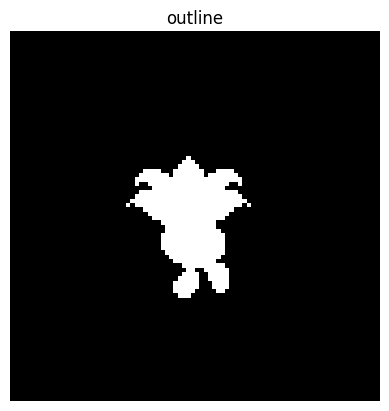

[3.18309886e-01 9.75551157e-17 5.34000349e-01 7.72017578e-02
 5.57528150e-02 6.91911016e-02 2.24109491e-01 1.53382225e-01
 1.36701294e-02 7.90040038e-02 1.66239055e-01 1.53929534e-02
 1.90328610e-02 8.64694192e-02 3.03813793e-02 4.30903385e-03
 5.45141228e-02 1.25674114e-01 3.96588855e-02 1.20766580e-02
 5.59146700e-02 3.85272976e-02 5.19644417e-02 2.00841393e-02
 1.22566544e-02]


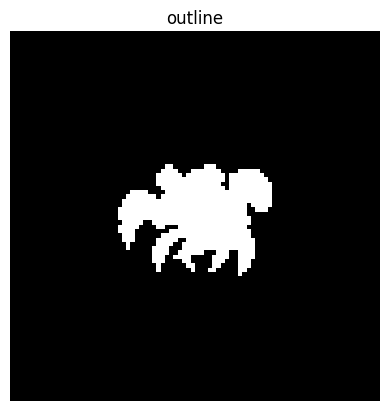

[3.18309886e-01 1.04325904e-16 4.51707797e-01 9.43840203e-02
 3.68894145e-02 4.69131226e-02 1.10103352e-01 1.17056915e-01
 4.01419574e-02 3.11716425e-02 6.86908421e-02 5.30680856e-02
 2.09434471e-02 6.32416022e-02 5.41715325e-02 2.84906272e-02
 4.29076260e-02 3.46565751e-02 1.38467713e-01 2.39776837e-02
 4.64589712e-02 6.29061214e-02 7.97044704e-02 5.24830399e-02
 8.76035782e-03]


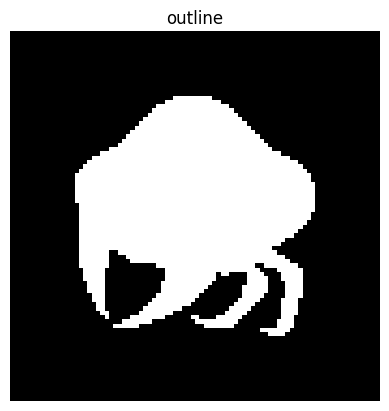

[0.31830989 0.03360365 0.04406175 0.02643609 0.03248149 0.00835268
 0.02476678 0.01587066 0.03163915 0.00566285 0.01390664 0.04453784
 0.00551797 0.00255437 0.00814699 0.04868259 0.01668048 0.01356414
 0.01049431 0.03775734 0.01383336 0.00737794 0.0089939  0.02272585
 0.02020472]


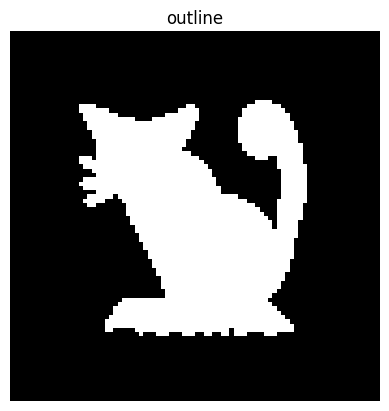

[0.31830989 0.05047311 0.11645037 0.13640167 0.05964635 0.07286558
 0.05314045 0.03879084 0.02401894 0.04076831 0.03305028 0.03732973
 0.06261458 0.04272013 0.02153657 0.02250123 0.0327792  0.03584123
 0.01928998 0.0666892  0.00071076 0.0053159  0.03679275 0.01636398
 0.03932242]


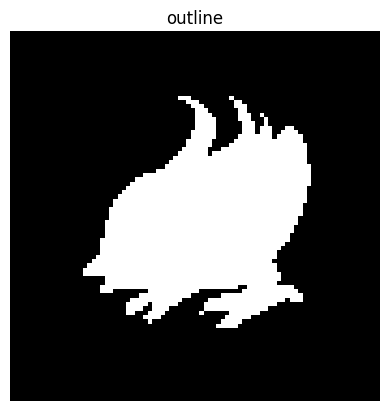

[0.31830989 0.0059093  0.06632674 0.04448894 0.01270988 0.04589174
 0.0340095  0.02360974 0.02571247 0.01191125 0.03497826 0.05430362
 0.01335234 0.01453076 0.02401345 0.0262617  0.00720562 0.01103932
 0.00490963 0.02266083 0.02289087 0.01219975 0.00623568 0.0091599
 0.03714998]


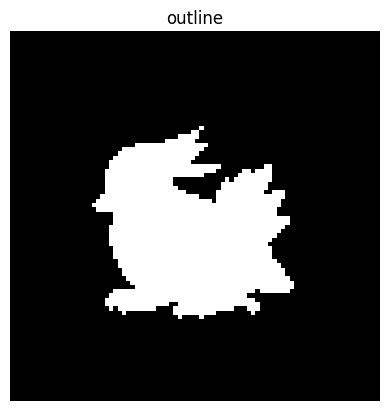

[0.31830989 0.0160658  0.07619251 0.04745113 0.04742017 0.05192588
 0.05626931 0.02976005 0.03944406 0.02146405 0.02253676 0.05532781
 0.05908366 0.01691657 0.02902302 0.03197343 0.00823845 0.01449844
 0.02273737 0.01901951 0.00819262 0.02070658 0.01630476 0.02013004
 0.03149442]


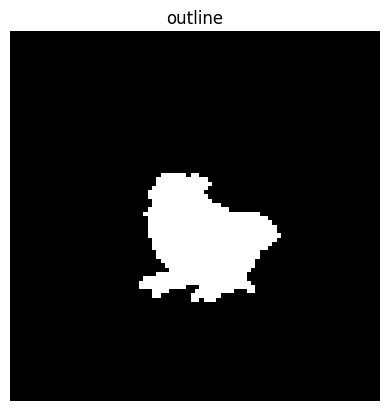

[3.18309886e-01 2.94085254e-16 4.74142790e-01 3.67404516e-02
 1.47033110e-02 6.49418954e-02 7.06603250e-02 8.83663183e-02
 3.32412916e-02 2.81814117e-02 1.37972956e-01 2.15361664e-02
 1.35853554e-01 5.41774376e-02 7.75096187e-02 1.46611241e-02
 1.47963990e-02 5.63315061e-02 6.48393655e-02 2.18273915e-02
 3.37357585e-02 4.57451883e-02 4.60210758e-02 3.88657897e-02
 1.56445893e-02]


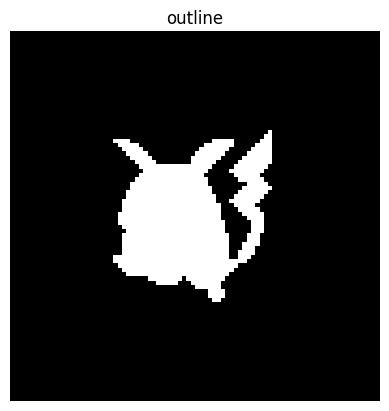

[0.31830989 0.02424337 0.26280302 0.03983929 0.0979397  0.02777154
 0.05505054 0.02254713 0.0793264  0.05978273 0.00868688 0.04044632
 0.01057524 0.09074408 0.01488188 0.01893716 0.07363735 0.01792189
 0.07036086 0.05517324 0.07990377 0.04411843 0.0477879  0.02742866
 0.04363486]


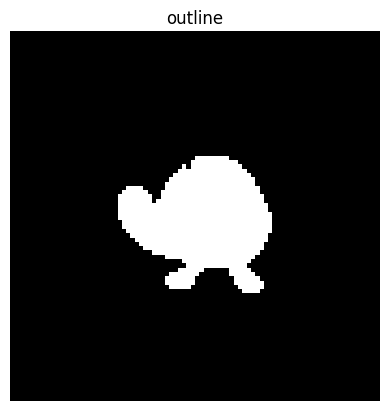

[3.18309886e-01 2.32762065e-16 3.82914158e-01 5.38299713e-02
 4.03680092e-02 6.91547952e-02 2.12313811e-03 6.10086943e-02
 3.26173346e-02 1.52052280e-02 5.47129713e-02 7.16764113e-02
 1.21795177e-01 3.24324474e-02 7.72483255e-02 4.34904762e-02
 7.53393928e-02 5.04373625e-02 7.55310673e-02 3.91296314e-02
 1.38887399e-02 6.01046148e-02 2.30771321e-02 6.93998037e-02
 4.79441788e-02]


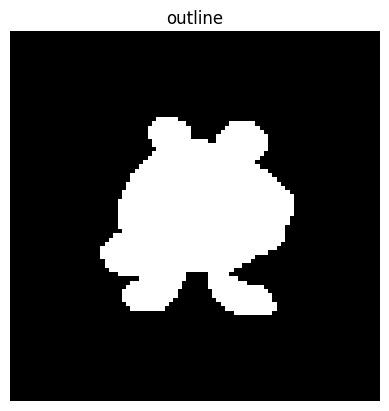

[0.31830989 0.01890959 0.10134803 0.04527068 0.0156504  0.03535895
 0.05599209 0.03211255 0.03653824 0.03686472 0.005867   0.04421278
 0.00592343 0.02545828 0.01346639 0.08330417 0.00554093 0.00894967
 0.00406166 0.02586565 0.01219129 0.007477   0.01668432 0.0272712
 0.07395625]


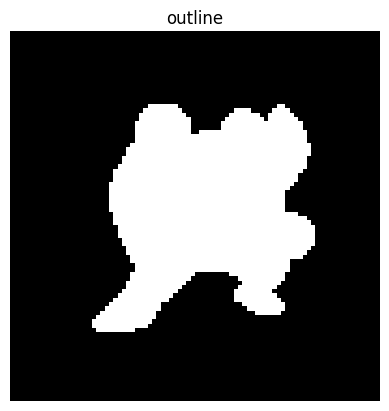

[0.31830989 0.02314297 0.04632903 0.04157855 0.01292551 0.02957059
 0.01690826 0.0119334  0.06645767 0.01780247 0.01184296 0.01219854
 0.01394343 0.0157442  0.00621412 0.0328982  0.01063291 0.01459694
 0.02603146 0.01634229 0.0131647  0.00631554 0.01753805 0.01877805
 0.04749872]


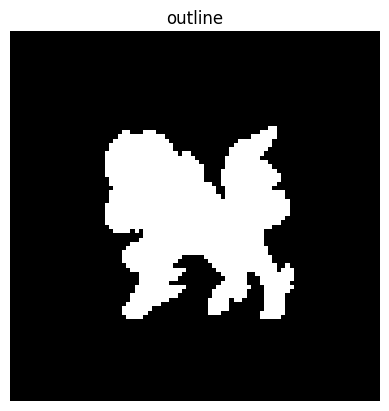

[0.31830989 0.01340154 0.0869305  0.06638967 0.00577527 0.06207193
 0.00052095 0.05907681 0.09367802 0.01345085 0.06006114 0.04399689
 0.02624647 0.02369106 0.06249363 0.07143404 0.02563515 0.03241597
 0.03810575 0.02665377 0.00742491 0.01341889 0.02053657 0.02949928
 0.03556661]


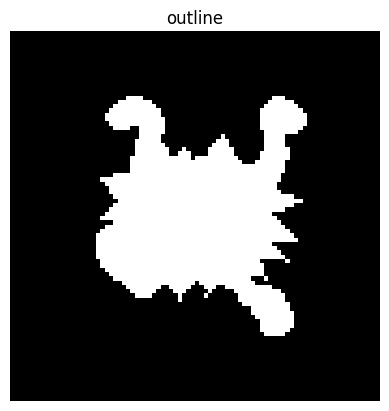

[0.31830989 0.03535393 0.11049476 0.06754912 0.02293451 0.01455001
 0.05556529 0.01562829 0.05112168 0.03196443 0.0184617  0.00805736
 0.00480421 0.02567081 0.02013963 0.01484738 0.01511502 0.00909993
 0.0173758  0.03898345 0.01121896 0.01357578 0.00797447 0.03306428
 0.05192192]


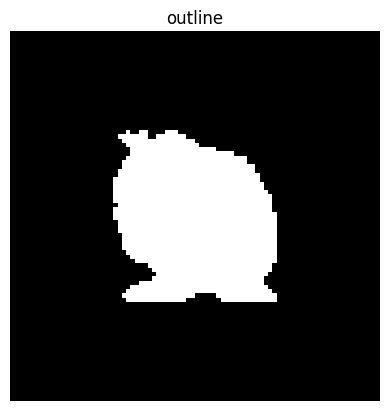

[0.31830989 0.00565606 0.1306688  0.06241585 0.00675815 0.03137666
 0.10062142 0.03933532 0.04943965 0.02109502 0.02677422 0.03979937
 0.02095985 0.01208513 0.04067787 0.02963159 0.01337549 0.01786194
 0.01566761 0.02727783 0.03073448 0.02351292 0.02137666 0.0080236
 0.03207508]


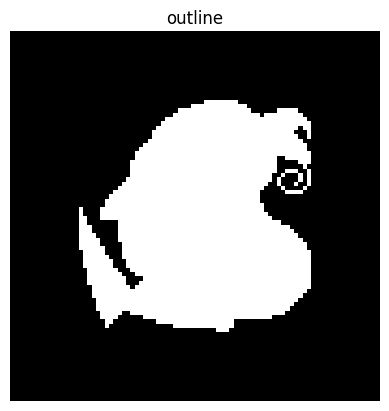

[0.31830989 0.01841012 0.0300223  0.03788534 0.00350471 0.02939388
 0.01104091 0.01438863 0.04292867 0.02484946 0.00881532 0.02752322
 0.00051573 0.00453773 0.00213098 0.02628407 0.02422978 0.0158513
 0.02443394 0.02652695 0.00877939 0.00961284 0.00482827 0.01797848
 0.01628202]


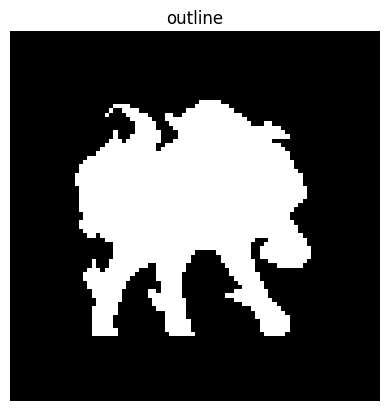

[0.31830989 0.05068877 0.04888555 0.06264956 0.00762782 0.01122318
 0.01358594 0.01107287 0.03018637 0.01370693 0.03789743 0.00611134
 0.01750995 0.00388121 0.02572635 0.04127189 0.00924434 0.01506692
 0.01857382 0.026486   0.00810389 0.0150297  0.02747654 0.040176
 0.05647033]


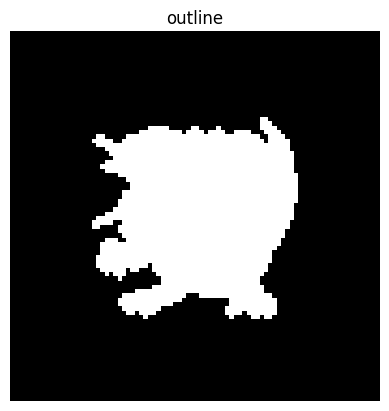

[0.31830989 0.01749431 0.05921037 0.00184142 0.01863503 0.00788751
 0.06073372 0.00802368 0.02649997 0.00558711 0.01026743 0.01267161
 0.03859251 0.01609727 0.02068156 0.03965671 0.01216155 0.01004816
 0.00845474 0.03764355 0.01562809 0.01549427 0.01187224 0.0212231
 0.01877952]


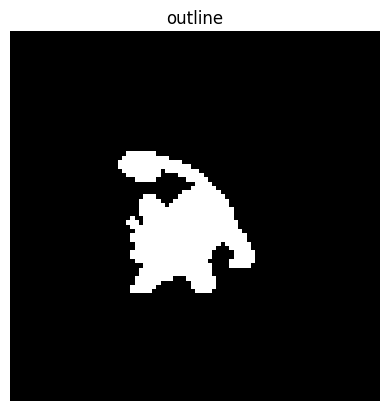

[0.31830989 0.00110459 0.41941601 0.05765759 0.08360411 0.09303256
 0.12074393 0.04498697 0.05655539 0.03723102 0.0849321  0.0553088
 0.03481865 0.12644332 0.01101713 0.05533201 0.03580892 0.06651053
 0.01890998 0.07485166 0.04285838 0.09488315 0.03697535 0.11140103
 0.02933213]


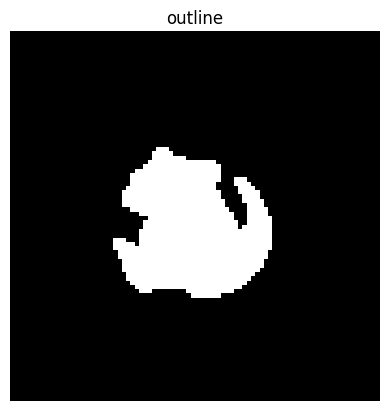

[3.18309886e-01 2.07175343e-16 2.82718483e-01 3.66560940e-02
 2.24630725e-02 7.20051147e-02 1.19615531e-01 4.37214359e-02
 4.34597893e-02 2.35992454e-02 8.13120225e-02 2.12226606e-02
 1.55877912e-02 6.28132258e-02 5.56403453e-02 9.93359425e-03
 2.82448740e-02 2.98036509e-02 6.07956904e-02 9.03727569e-03
 6.85096261e-02 3.14157206e-02 3.40408559e-02 2.80473334e-02
 1.07549806e-02]


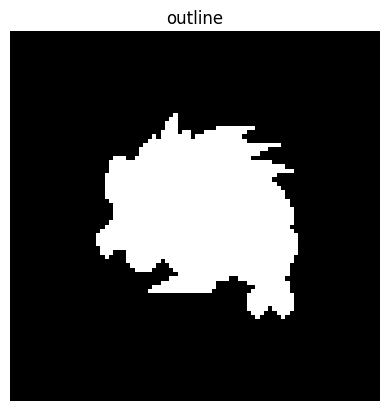

[0.31830989 0.02647659 0.07136669 0.04430808 0.02102773 0.02883242
 0.04895885 0.02805407 0.0324682  0.01553518 0.01635907 0.02755307
 0.01361159 0.00974426 0.02350386 0.03113623 0.01407772 0.01728667
 0.00843492 0.01447997 0.00060241 0.01206829 0.00215186 0.03147198
 0.02026187]


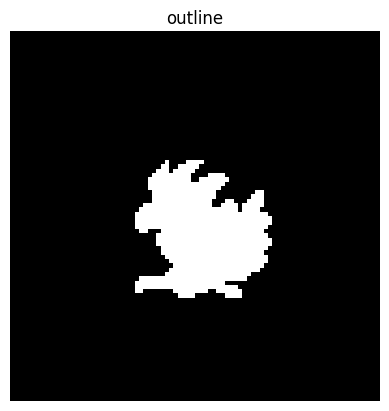

[3.18309886e-01 1.80372089e-16 4.21656237e-01 3.49131077e-02
 2.55330595e-02 5.57752480e-02 3.19250784e-03 9.10907495e-02
 2.94676734e-02 2.77367615e-02 1.06898766e-01 1.57425995e-02
 1.21843946e-01 3.87559809e-02 1.35565242e-02 2.08648248e-02
 4.60881071e-02 5.89319044e-02 4.57224083e-02 2.59465865e-02
 3.30064279e-02 4.46144975e-02 6.50815367e-02 3.59206919e-02
 2.42727453e-02]


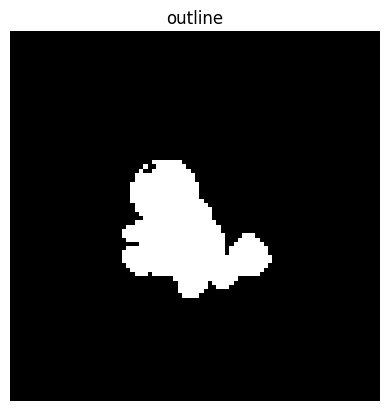

[3.18309886e-01 1.00448163e-16 4.14608118e-01 1.00199338e-01
 7.55921608e-02 1.00068740e-01 6.51294006e-02 1.41036487e-01
 1.79514168e-02 6.99720223e-02 1.29816169e-01 6.72787921e-02
 5.50133082e-02 4.38181238e-02 4.24779299e-02 4.80507104e-02
 5.29717856e-02 7.03658739e-02 8.43175485e-02 3.70731596e-02
 2.00049008e-03 5.30155203e-02 6.11377685e-02 4.98955307e-02
 3.57169166e-02]


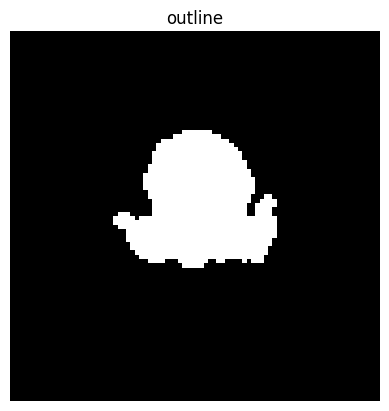

[3.18309886e-01 2.22736260e-16 3.47754757e-01 1.30935103e-02
 1.65245336e-02 9.49868549e-02 7.07322984e-02 3.29932670e-02
 1.76755351e-02 8.29329599e-03 1.16623395e-01 3.00476985e-02
 8.27485145e-02 4.20335703e-02 4.67658555e-02 2.41000754e-02
 3.08526747e-02 7.13874106e-02 4.40096684e-02 1.60382501e-03
 2.30248102e-02 4.75970877e-02 4.41902938e-02 4.15363461e-02
 1.39857589e-02]


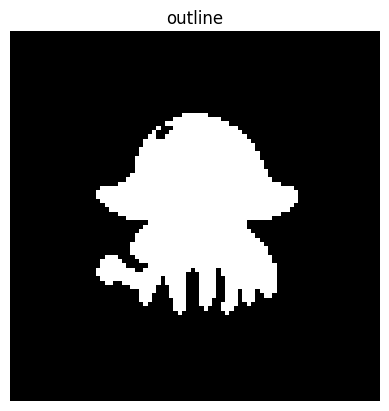

[0.31830989 0.02699913 0.10390621 0.03979436 0.01286673 0.01007334
 0.04678677 0.01190137 0.02470775 0.02592066 0.02105716 0.06994101
 0.00970336 0.01369189 0.03298019 0.0449689  0.02173284 0.02218029
 0.03847357 0.06821354 0.01181396 0.02134286 0.00742026 0.01025418
 0.02702319]


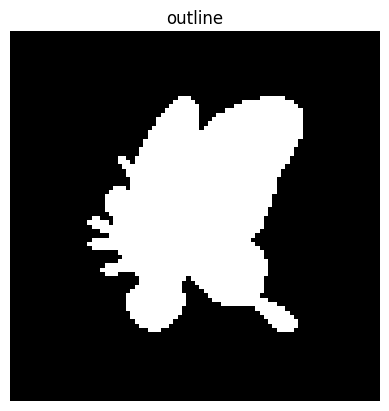

[0.31830989 0.03209095 0.06761402 0.04515739 0.01885777 0.04120025
 0.03330739 0.01536028 0.06033347 0.0157713  0.02164455 0.02821438
 0.00646016 0.01140678 0.00725586 0.03569958 0.01696391 0.01668345
 0.02007493 0.0131714  0.00771774 0.00552576 0.02255552 0.02291052
 0.00784701]


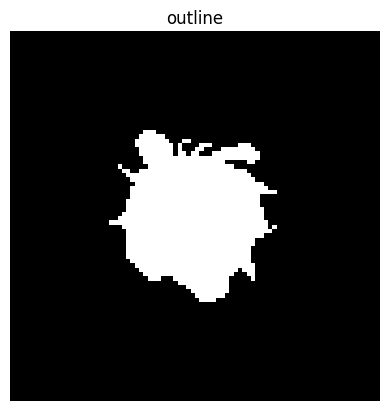

[0.31830989 0.00478051 0.25705297 0.02608938 0.01789934 0.02320379
 0.10755338 0.01668093 0.06146583 0.02795422 0.01022809 0.05201482
 0.06637713 0.0137612  0.02691359 0.05196642 0.00871214 0.00626972
 0.02606118 0.02675608 0.06466913 0.02795997 0.02809438 0.02464132
 0.0202099 ]


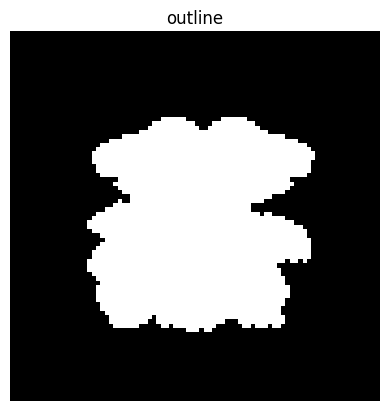

[0.31830989 0.00675849 0.01550044 0.02140485 0.00583683 0.02069199
 0.00503615 0.01213957 0.01550033 0.01120903 0.00693728 0.02406438
 0.00079703 0.00682095 0.00717182 0.01091677 0.00909912 0.00629423
 0.01189654 0.0276926  0.00213777 0.00855724 0.00324768 0.00998373
 0.01533756]


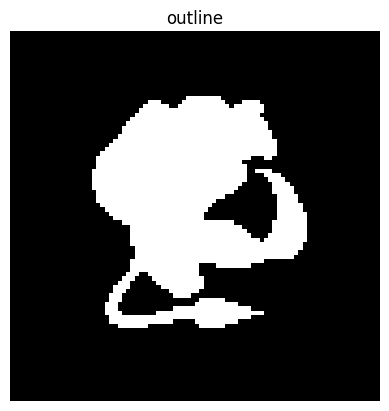

[0.31830989 0.05845692 0.05454319 0.05438593 0.06023552 0.02647987
 0.0086963  0.05802183 0.07234092 0.02865209 0.05816148 0.05976662
 0.02497041 0.01755279 0.05845601 0.01746189 0.02380761 0.03307861
 0.04952827 0.04713649 0.02054555 0.02632923 0.0307091  0.03030823
 0.04433601]


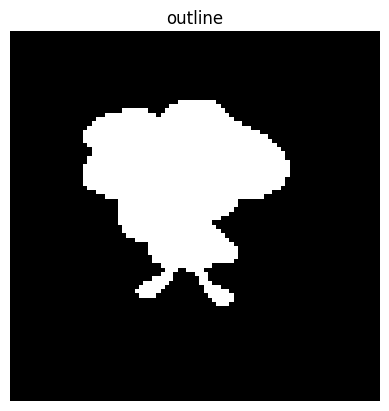

[0.31830989 0.02222159 0.1161087  0.00406302 0.01654484 0.10397289
 0.05996665 0.04480491 0.03802935 0.02722866 0.00740021 0.05407182
 0.00892893 0.03573955 0.01891686 0.03364375 0.02036251 0.03681403
 0.01676411 0.00915599 0.00550404 0.01824218 0.01267991 0.02383969
 0.04414013]


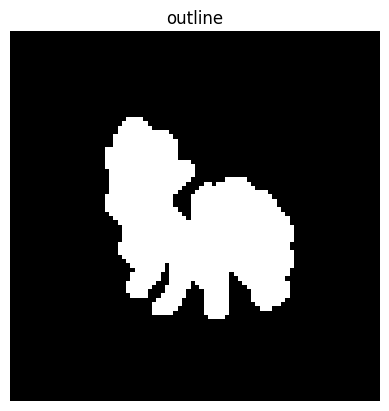

[0.31830989 0.02656879 0.11128472 0.09374895 0.02247476 0.09157023
 0.03422127 0.05282667 0.02342942 0.02027985 0.01896761 0.00929897
 0.02530959 0.01494209 0.05644405 0.03528592 0.02860086 0.02775778
 0.01511875 0.02445224 0.01719013 0.01682331 0.02237071 0.01627019
 0.05251678]


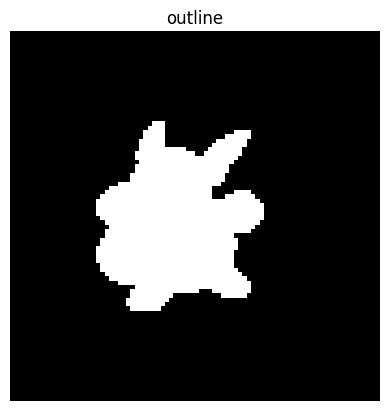

[0.31830989 0.01867824 0.18505649 0.03306785 0.01148774 0.03077444
 0.09417424 0.01573721 0.02143353 0.0204917  0.01075637 0.03880859
 0.00804266 0.02820139 0.02609105 0.05606376 0.00488324 0.00705409
 0.04492404 0.12670931 0.02794947 0.03009549 0.03080269 0.03566081
 0.03113933]


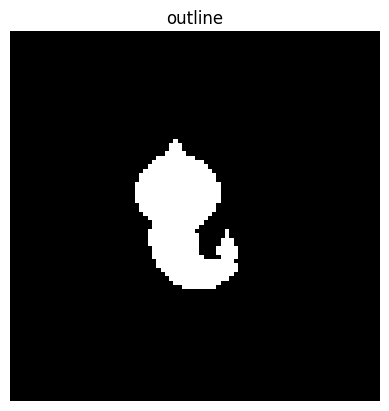

[3.18309886e-01 3.43065240e-16 4.85433478e-01 1.26709315e-01
 5.11548780e-02 2.40349750e-02 1.07550124e-01 2.56916628e-01
 3.06120776e-02 1.24235864e-01 3.62561637e-02 1.94424509e-02
 7.36110704e-02 1.37862488e-01 5.54165255e-02 6.52599859e-03
 7.70716564e-02 6.11459818e-02 3.51273177e-02 1.31834613e-02
 4.21931677e-02 1.70776188e-01 3.40630825e-02 1.56873133e-02
 8.39353614e-03]


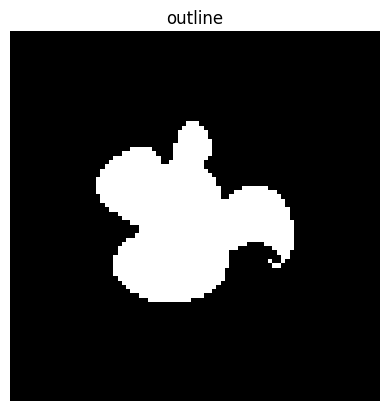

[0.31830989 0.03015779 0.16163805 0.00357335 0.0270673  0.11479259
 0.02295467 0.03995232 0.05448912 0.03444799 0.03905052 0.12948151
 0.00747137 0.02554583 0.03800288 0.02082904 0.01839719 0.03960234
 0.06832209 0.01305556 0.02810352 0.02418828 0.02101966 0.02562235
 0.0458417 ]


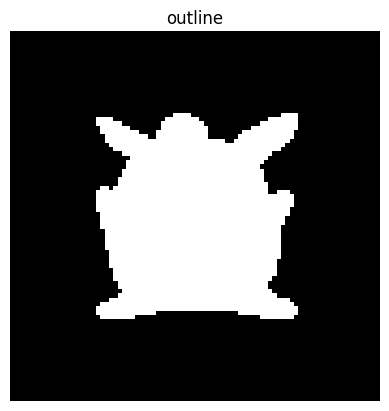

[0.31830989 0.01150803 0.0181832  0.00721535 0.01808384 0.01266471
 0.0213007  0.00642009 0.00502138 0.0178802  0.01163375 0.01530447
 0.01633602 0.00352408 0.00705716 0.01973222 0.01315664 0.006923
 0.01344434 0.01744509 0.00736802 0.00831096 0.00875805 0.00857257
 0.02621153]


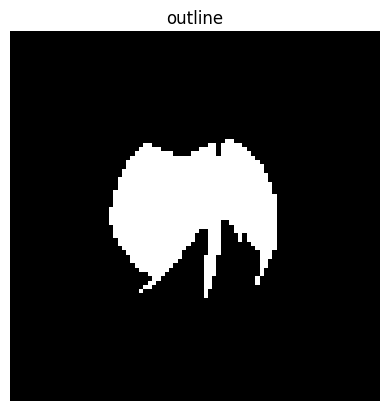

[0.31830989 0.00875768 0.23021988 0.11146777 0.0727187  0.03326585
 0.08416974 0.10379773 0.02447444 0.02048978 0.04892266 0.03703215
 0.04797941 0.0637359  0.03803033 0.02966893 0.0272987  0.00941053
 0.05596633 0.04896118 0.016949   0.00652489 0.02807408 0.05429189
 0.04049627]


In [1]:
from shapedescriptor import ZernikeMoments
from imutils.paths import list_images
from helper import draw
import numpy as np
import pickle
import imutils
import cv2

# initialize our descriptor (Zernike Moments with a radius
# of 21 used to characterize the shape of our pokemon) and
# our index dictionary
desc = ZernikeMoments(21)
index = {}

# loop over the sprite images
for spritePath in list_images("sprites"):
	# parse out the pokemon name, then load the image and
	# convert it to grayscale
	pokemon = spritePath[spritePath.rfind("/") + 1:].replace(".png", "")
	image = cv2.imread(spritePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # pad the image with extra white pixels to ensure the
	# edges of the pokemon are not up against the borders
	# of the image
	image = cv2.copyMakeBorder(image, 15, 15, 15, 15,
		cv2.BORDER_CONSTANT, value = 255)

    # invert the image and threshold it
	thresh = cv2.bitwise_not(image)
	thresh[thresh > 0] = 255

    # initialize the outline image, find the outermost
	# contours (the outline) of the pokemone, then draw
	# it
	outline = np.zeros(image.shape, dtype = "uint8")
	cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
	cv2.drawContours(outline, [cnts], -1, 255, -1)
	draw("outline", outline)

	# compute Zernike moments to characterize the shape
	# of pokemon outline, then update the index
	moments = desc.describe(outline)
	print(moments)
	index[pokemon] = moments


# write the index to file
f = open("idx.cpickle", "wb")
f.write(pickle.dumps(index))
f.close()


3. Find Out Pokemon By Shape

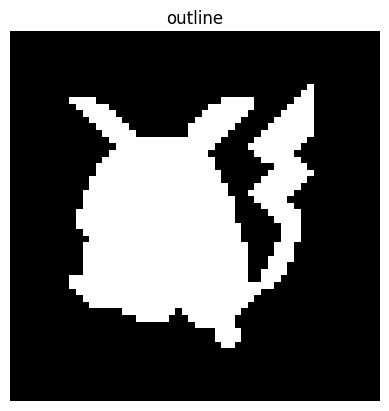

That pokemon is: PIKACHU


In [46]:
from skimage import exposure
from helper import draw
from featurerepo import FeatureRepo
from shapedescriptor import ZernikeMoments
import numpy as np
import imutils
import cv2
import pickle

# load the query image, compute the ratio of the old height
# to the new height, clone it, and resize it
image = cv2.imread("sprites/pikachu.png")
# ratio = image.shape[0] / 300.0
# orig = image.copy()
# image = imutils.resize(image, height = 300)

# # convert the image to grayscale, blur it, and find edges
# # in the image
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray = cv2.bilateralFilter(gray, 11, 17, 17)
# edged = cv2.Canny(gray, 30, 200)

# # find contours in the edged image, keep only the largest
# # ones, and initialize our screen contour
# cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cnts = imutils.grab_contours(cnts)
# cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
# screenCnt = None

# # loop over our contours
# for c in cnts:
# 	# approximate the contour
# 	peri = cv2.arcLength(c, True)
# 	approx = cv2.approxPolyDP(c, 0.015 * peri, True)

#     # if our approximated contour has four points, then
# 	# we can assume that we have found our screen
# 	if len(approx) == 4:
# 		screenCnt = approx
# 		break


# cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3) 
# # draw("Game Boy Screen", image) 

# # now that we have our screen contour, we need to determine
# # the top-left, top-right, bottom-right, and bottom-left
# # points so that we can later warp the image -- we'll start
# # by reshaping our contour to be our finals and initializing
# # our output rectangle in top-left, top-right, bottom-right,
# # and bottom-left order
# pts = screenCnt.reshape(4, 2)
# rect = np.zeros((4, 2), dtype = "float32")

# # the top-left point has the smallest sum whereas the
# # bottom-right has the largest sum
# s = pts.sum(axis = 1)
# rect[0] = pts[np.argmin(s)]
# rect[2] = pts[np.argmax(s)]

# # compute the difference between the points -- the top-right
# # will have the minumum difference and the bottom-left will
# # have the maximum difference
# diff = np.diff(pts, axis = 1)
# rect[1] = pts[np.argmin(diff)]
# rect[3] = pts[np.argmax(diff)]

# # multiply the rectangle by the original ratio
# rect *= ratio

# # now that we have our rectangle of points, let's compute
# # the width of our new image
# (tl, tr, br, bl) = rect
# widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
# widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))

# # ...and now for the height of our new image
# heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
# heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))

# # take the maximum of the width and height values to reach
# # our final dimensions
# maxWidth = max(int(widthA), int(widthB))
# maxHeight = max(int(heightA), int(heightB))

# # construct our destination points which will be used to
# # map the screen to a top-down, "birds eye" view
# dst = np.array([
# 	[0, 0],
# 	[maxWidth - 1, 0],
# 	[maxWidth - 1, maxHeight - 1],
# 	[0, maxHeight - 1]], dtype = "float32")

# # calculate the perspective transform matrix and warp
# # the perspective to grab the screen
# M = cv2.getPerspectiveTransform(rect, dst)
# warp = cv2.warpPerspective(orig, M, (maxWidth, maxHeight))

# # draw("warp", warp)

# # convert the warped image to grayscale and then adjust
# # the intensity of the pixels to have minimum and maximum
# # values of 0 and 255, respectively
# warp = cv2.cvtColor(warp, cv2.COLOR_BGR2GRAY)
# warp = np.uint8(exposure.rescale_intensity(warp, out_range = (0, 255)))

# # the pokemon we want to identify will be in the top-right
# # corner of the warped image -- let's crop this region out
# (h, w) = warp.shape
# (dX, dY) = (int(w * 0.4), int(h * 0.45))
# crop = warp[10:dY, w - dX:w - 10]

# draw("image", image)
# draw("edge", edged)
# draw("warp", warp, False)
# draw("crop", crop, False)

crop = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# crop = imutils.resize(crop, width = 64)
# threshold the image
thresh = cv2.adaptiveThreshold(crop, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
	cv2.THRESH_BINARY_INV, 11, 7)
# draw("thresh", thresh)
# initialize the outline image, find the outermost
# contours (the outline) of the pokemon, then draw
# it
outline = np.zeros(crop.shape, dtype = "uint8")
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
cv2.drawContours(outline, [cnts], -1, 255, -1)

draw("outline", outline)


# compute Zernike moments to characterize the shape of
# pokemon outline
desc = ZernikeMoments(21)
queryFeatures = desc.describe(outline)

# perform the search to identify the pokemon
index = pickle.load(open("idx.cpickle", "rb"))
repo = FeatureRepo(index)
results = repo.search(queryFeatures)
print("That pokemon is: {}".format(results[0][1].upper()))